In [8]:
from ctlearn_manager.tri_model import CTLearnTriModelManager
from ctlearn_manager.io.io import load_model_from_index, load_DL2_data_RF
from ctlearn_manager.utils.DL2_processing import DL2DataProcessor
from ctlearn_manager.utils.RF_counterpart import LazyRFCounterpart, RFCounterpart
from ctlearn_manager.utils.who_is_better import WhoIsBetter
from ctlearn_manager.utils.utils import ClusterConfiguration
import astropy.units as u


In [2]:
MODEL_INDEX_FILE = "/home/bastien.lacave/PhD/Analysis/CTLearnManager/ctlearn_models_index.h5"
i = 4
cluster_config = ClusterConfiguration(python_env='ctlearn', partition='short', time='2:00:00', use_cluster=True)
energy_model = load_model_from_index(f"LST1_energy_CRABdec_{i}", MODEL_INDEX_FILE)
direction_model = load_model_from_index(f"LST1_direction_CRABdec_{i}", MODEL_INDEX_FILE)
type_model = load_model_from_index(f"LST1_type_CRABdec_{i}", MODEL_INDEX_FILE)
Stereo_Tri_Model = CTLearnTriModelManager(direction_model=direction_model, energy_model=energy_model, type_model=type_model, cluster_configuration=cluster_config)

🔧 Using cluster lst-cluster with account aswg and python environment ctlearn


🧠 Model name: LST1_energy_CRABdec_4
🧠 Model name: LST1_direction_CRABdec_4
🧠 Model name: LST1_type_CRABdec_4


In [3]:
import glob
dl2_files_tjark = glob.glob("/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run0*.h5")
dl2_files_bastien = glob.glob("/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/LST-1.Run03232.*.dl2.h5")
# print(len(dl2_files_bastien))
# Theta2plot = DL2DataProcessor(dl2_files_tjark, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")
# Theta2plot = DL2DataProcessor(dl2_files_bastien, Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/fefs/aswg/workspace/bastien.lacave/ctlearnLSTData/DL2_Multimodels/03232/")
DL2Processor = DL2DataProcessor([
    '/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run02929.h5',
    '/fefs/aswg/workspace/tjark.miener/DeepCrab_new/DL2/real/dl2_LST-1.Run03232.h5',
    ], Stereo_Tri_Model, gammaness_cut=0.9, dl2_processed_dir="/home/bastien.lacave/PhD/data/CTLearn/Tjark/")
# runs = [2929, 3232]
RFDL2Processor = LazyRFCounterpart(DL2Processor, dl2_processed_dir="/home/bastien.lacave/PhD/data/RF/")



Preprocessing DL2 (~50min/run), only once


Loading processed data: 100%|██████████| 2/2 [00:04<00:00,  2.01s/it]


[2929, 3232]
Preprocessing DL2 (~50min/run), only once


Loading processed data: 100%|██████████| 2/2 [00:01<00:00,  1.19it/s]


In [10]:
runs = [2929,2930,2931,2950,2970,2971,2972,2973,2988,3095,3096,3273,3274,3275,3318,3319,3320,3338,2914,2932,2933,2934,2974,2975,2976,2989,2990,2991,3004,3005,3006,3276,3277,3278,3279,3321,3328,3329,3330,3339,3340,3355,3356,3598,3632,3672,3673,3674,3675,6872,6873,6874,6892,6893,7133,7161,7195,7196,7197,7227,7228,7253,7274,2977,2992,3007,3008,3231,3243,3373,3599,3600,3615,3633,3634,3676,3677,3706,3707,4067,4086,6875,6894,7097,7098,7099,7199,7231,7254,7255,7256,7275,3232,3601,3635,3708,4068,4087,6895,7136,7200,7232,7233,7276,7277]

RFProcessor = RFCounterpart(dl2_processed_dir="/home/bastien.lacave/PhD/data/RF/",
                            CTLearnTriModelManager = Stereo_Tri_Model,
                            runs=runs
                            )

Preprocessing DL2 (~50min/run), only once
💾 Testing script saved in /home/bastien.lacave/PhD/data/RF//process_dl2_dl2_LST-1.Run03095.h5.sh
Submitted batch job 43706244


Loading processed data: 100%|██████████| 105/105 [09:45<00:00,  5.57s/it]


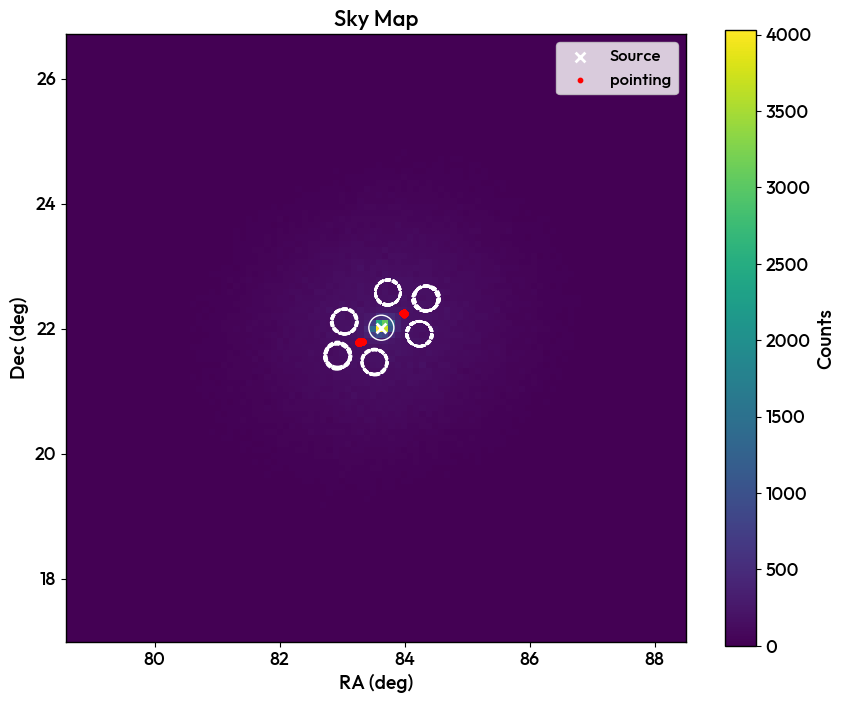

In [11]:
RFProcessor.plot_skymap()

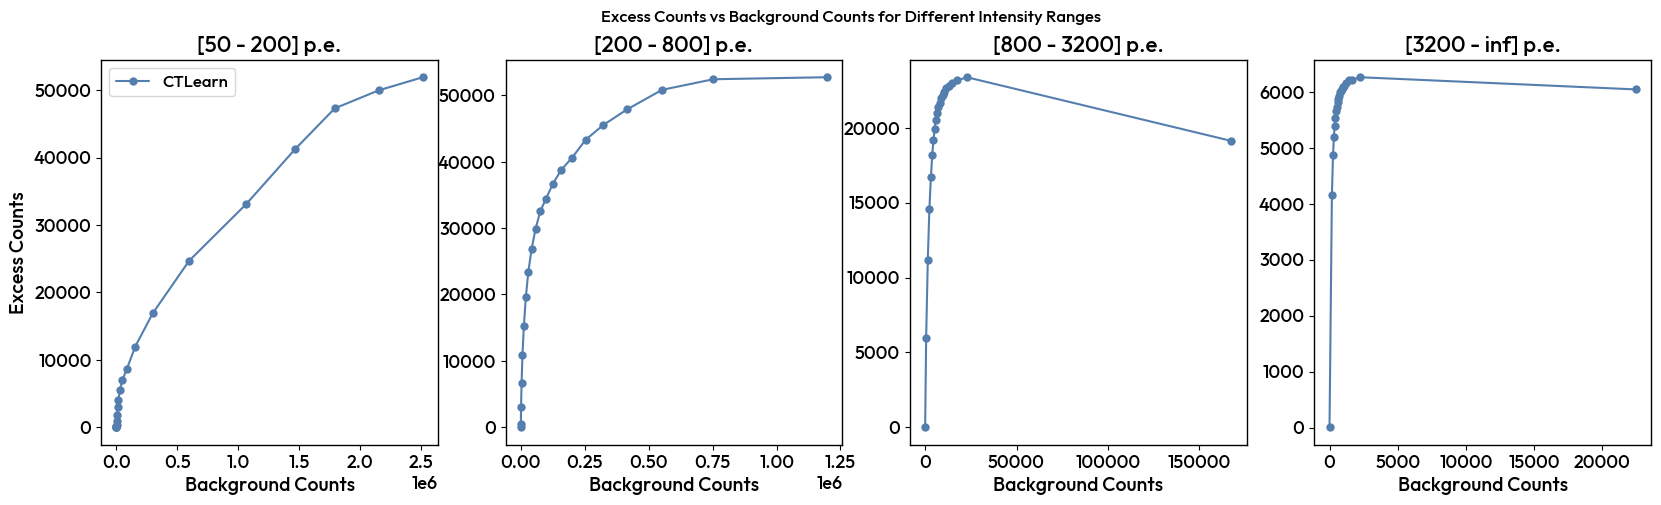

In [12]:
RFProcessor.plot_bkg_discrimination_capability()

Computing on-off counts...


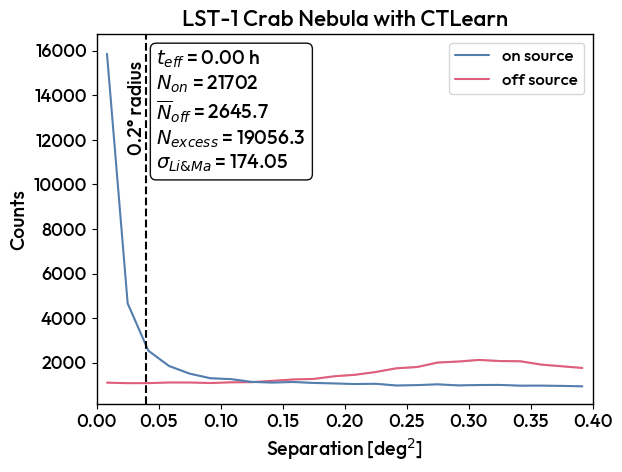

In [14]:
RFProcessor.plot_theta2_distribution(25)

In [4]:
WhoIsBetter = WhoIsBetter([DL2Processor, RFDL2Processor], labels=["CTLearn", "RF"])

/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:244: RuntimeWarning: divide by zero encountered in divide
  flux_factor[tolerance_mask] *= (N_sigma / lima_signi[tolerance_mask])
/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:246: RuntimeWarning: invalid value encountered in multiply
  lima_signi[tolerance_mask] = li_ma_significance((time_factor*(flux_factor[tolerance_mask]*


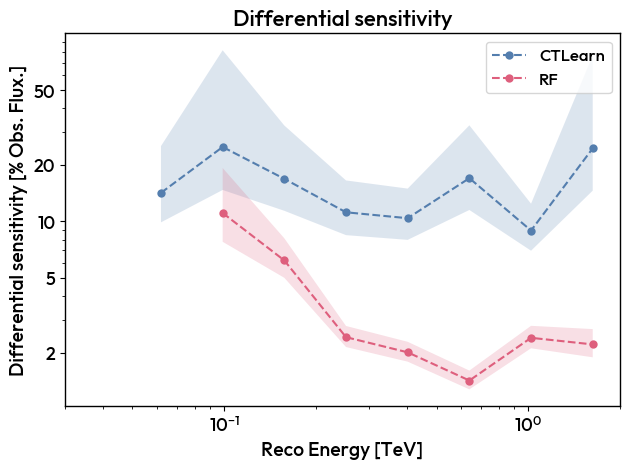

/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/utils.py:261: RuntimeWarning: invalid value encountered in divide
  bin_heights = bin_heights / np.sum(bin_heights)
/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/DL2_processing.py:629: RuntimeWarning: divide by zero encountered in divide
  psf - 1/np.sqrt(np.sum(h_on, axis=1)),
/home/bastien.lacave/miniforge3/envs/ctlearn/lib/python3.10/site-packages/ctlearn_manager/utils/DL2_processing.py:630: RuntimeWarning: divide by zero encountered in divide
  psf + 1/np.sqrt(np.sum(h_on, axis=1)),


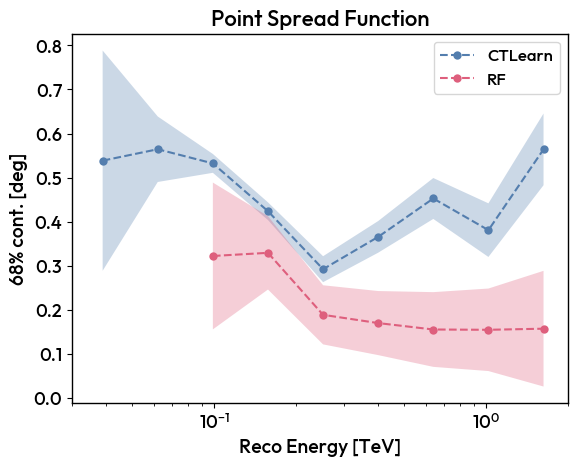

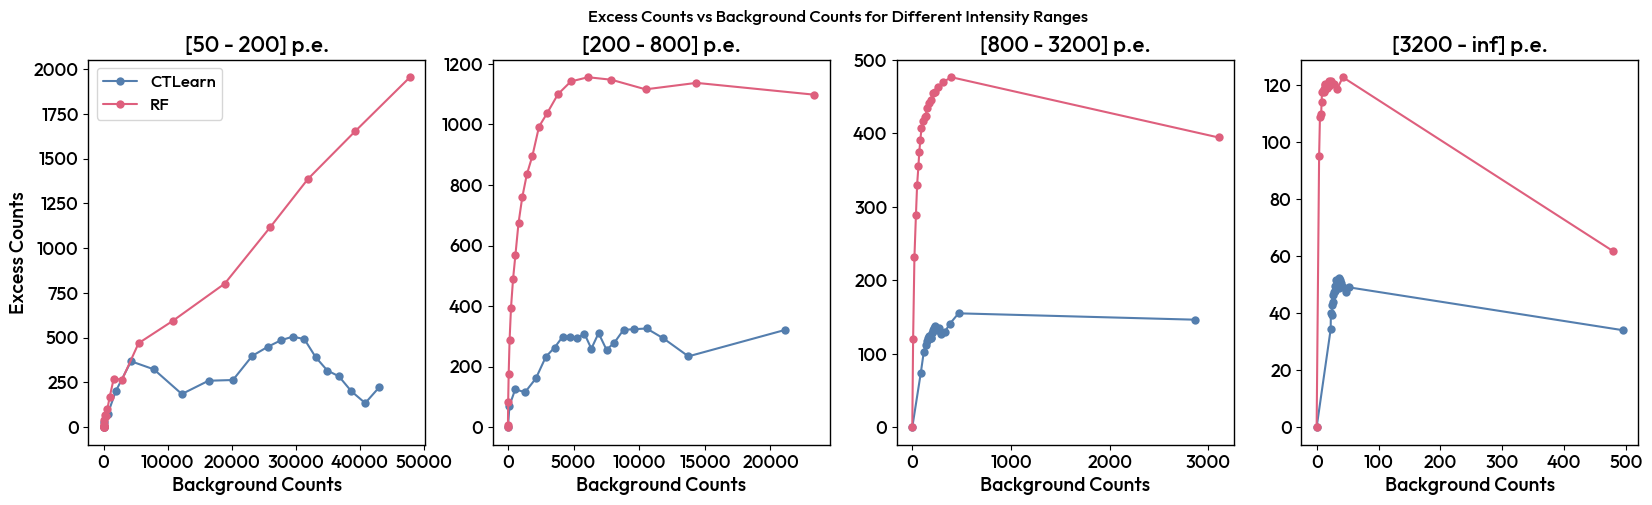

In [5]:
WhoIsBetter.plot_sensitivity()
WhoIsBetter.plot_PSF()
WhoIsBetter.plot_bkg_discrimination_capability()

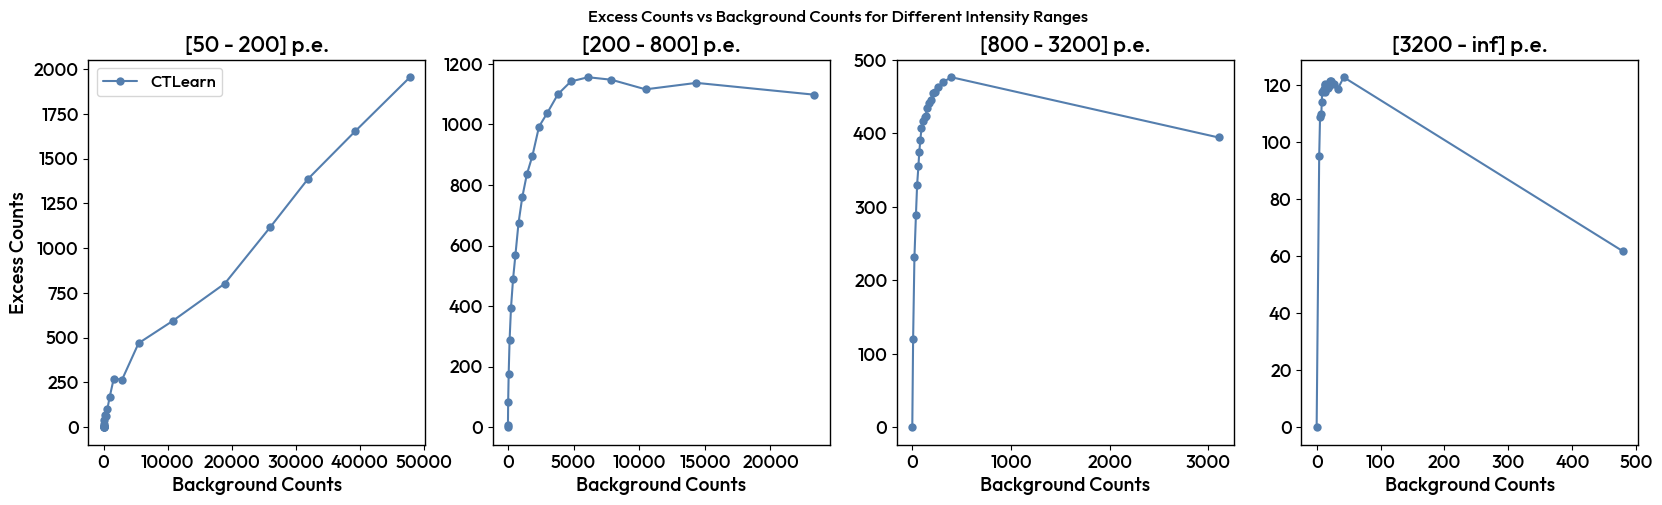

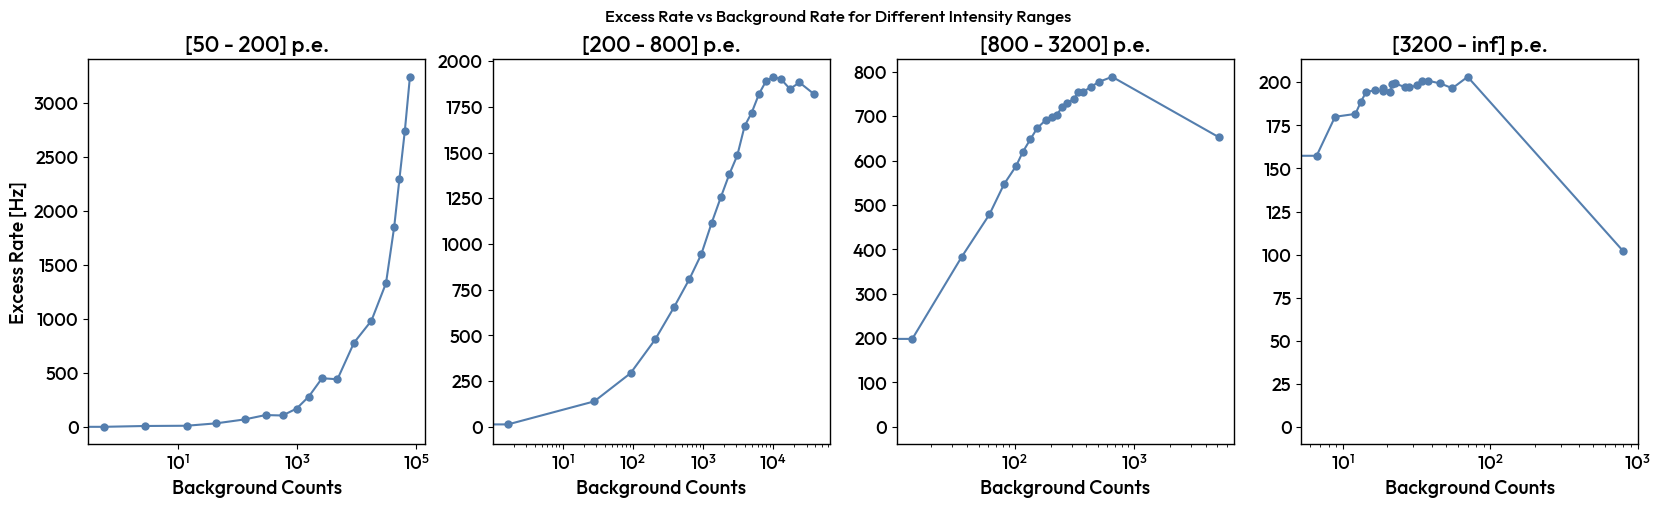

In [6]:
# RFDL2Processor.plot_excess_and_background_rates_vs_energy()
# RFDL2Processor.plot_theta2_distribution(25)
# RFDL2Processor.plot_PSF()
# RFDL2Processor.plot_sensitivity()
# RFDL2Processor.plot_skymap()
RFDL2Processor.plot_bkg_discrimination_capability()

RFDL2Processor.plot_excess_vs_background_rates()